# Identifying different species of Iris Flowers using Boosting

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# import some data to play with
iris_dataset = datasets.load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

ml_agent = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)

In [4]:
def train_boosted_agent(X_train, X_test, y_train, y_test, ml_agent):
    ml_agent.fit(X_train,y_train)
    print(ml_agent, '\n \n \n')
    print('*' * 10, 'CONFUSION MATRIX', '*' * 10)
    predictions = ml_agent.predict(X_test)
    print(confusion_matrix(y_test,predictions), '\n \n \n')
    print('*' * 10, 'CLASSIFICATION REPORT', '*' * 10)
    print(classification_report(y_test,predictions))
    
    return ml_agent

In [5]:
train_boosted_agent(X_train, X_test, y_train, y_test, ml_agent)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None) 
 
 

********** CONFUSION MATRIX **********
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]] 
 
 

********** CLASSIFICATION REPORT **********
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [6]:
def plot_predictions(X, Y, agent):
    h = .02  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = agent.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'][:,:2], iris_dataset['target'], random_state=0)


In [8]:
train_boosted_agent(X_train, X_test, y_train, y_test, ml_agent)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None) 
 
 

********** CONFUSION MATRIX **********
[[13  0  0]
 [ 0  6 10]
 [ 0  5  4]] 
 
 

********** CLASSIFICATION REPORT **********
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.55      0.38      0.44        16
          2       0.29      0.44      0.35         9

avg / total       0.64      0.61      0.61        38



AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

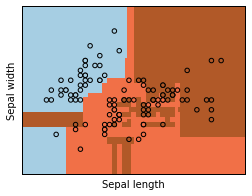

In [9]:
plot_predictions(X_train, y_train, ml_agent)

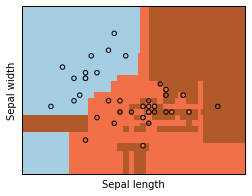

In [10]:
plot_predictions(X_test, y_test, ml_agent)